## Load Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import glob
import re
from sklearn import datasets
from sklearn import model_selection

!pip install apyori
#### BUILDING MODEL #####
from sklearn.model_selection import train_test_split

### SUPERVISED LEARNING ###
## Classification ##
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Regression ##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

### UNSUPERVISED LEARNING ###
## Clustering ##
from sklearn.cluster import KMeans

## Association Rules ##
from apyori import apriori

### OTHERS ###
## Dimensionality Reduction ##
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Metrics ##
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    roc_auc_score,
    classification_report,
)

## Pipeline ##
from sklearn.pipeline import Pipeline

## Natural Language Processing ##
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=09d924d31cc804231593811f068eed7f6ef831de41b87386f1264e0d120f08c6
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [70]:
## FEATURE SCALING ##
# feature scaling
from sklearn.preprocessing import (
    StandardScaler, 
    RobustScaler, 
    MinMaxScaler,
    MaxAbsScaler,
    Normalizer,
)

In [51]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Online Course')
!pwd

Mounted at /content/drive
/content/drive/My Drive/Online Course


# Classification

In [92]:
  # loading dataset
  seed = 50
  dataset = datasets.load_wine()
  X = dataset.data; y = dataset.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  kfold = model_selection.KFold(n_splits=10, random_state=seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [93]:
# loading model
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K Nearest Neighbour', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('Neural Network', MLPClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))


In [104]:
# evaluating the model
results = []
for name, model in models:
      print(name)
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      accuracy = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
      recall = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall_micro")
      precision = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="precision_micro")
      f1_score = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_micro")
      result = {'algorithm': name, 
                'accuracy_per_iter': accuracy, 'accuracy_mean': accuracy.mean(), 'accuracy_std': accuracy.std(),
                'recall_mean': recall.mean(),'precision_mean': precision.mean(), 'f1_mean': f1_score.mean()}
      results.append(result)
results = pd.DataFrame(results)
results = results.sort_values("accuracy_mean",ascending=False)

Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

K Nearest Neighbour
Naive Bayes
Support Vector Machine


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Neural Network


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Decision Tree
Random Forest
Gradient Boosting


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


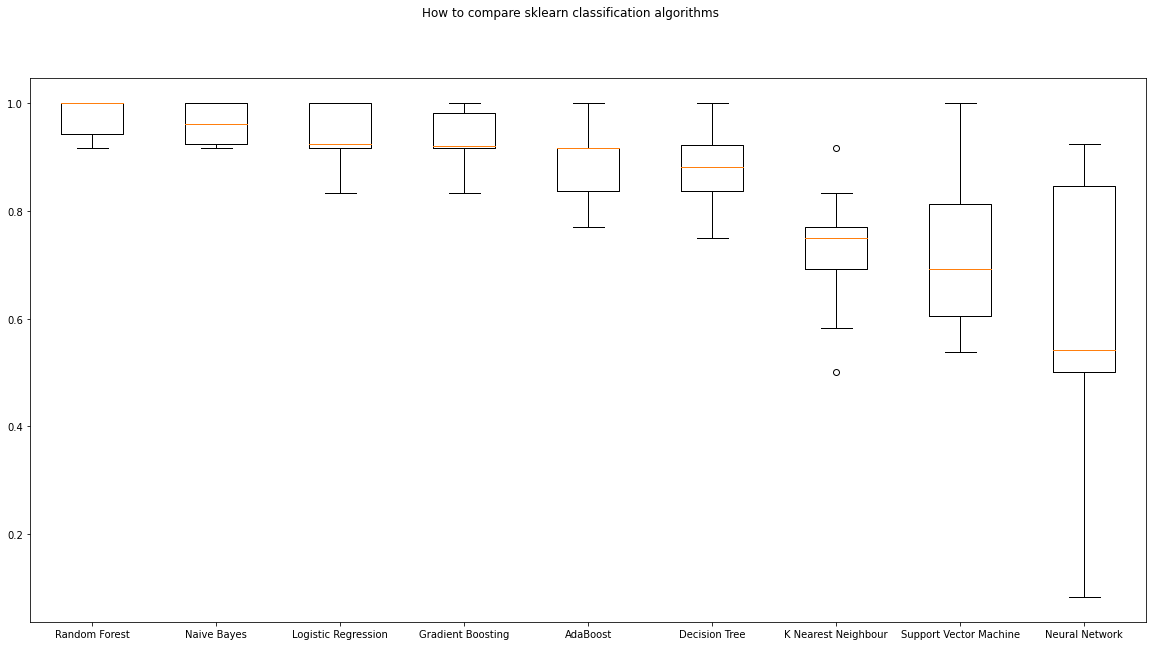

,algorithm,accuracy_per_iter,accuracy_mean,accuracy_std,recall_mean,precision_mean,f1_mean
6,Random Forest,"[1.0, 0.9230769230769231, 1.0, 1.0, 1.0, 0.916...",0.975641,0.037246,0.967949,0.975641,0.967949
2,Naive Bayes,"[0.9230769230769231, 0.9230769230769231, 1.0, ...",0.960256,0.039806,0.960256,0.960256,0.960256
0,Logistic Regression,"[0.9230769230769231, 1.0, 0.9230769230769231, ...",0.942949,0.052818,0.942949,0.942949,0.942949
7,Gradient Boosting,"[1.0, 0.8461538461538461, 0.9230769230769231, ...",0.927564,0.056253,0.927564,0.927564,0.927564
8,AdaBoost,"[1.0, 0.8461538461538461, 0.7692307692307693, ...",0.887179,0.062361,0.887179,0.887179,0.887179
5,Decision Tree,"[0.8461538461538461, 0.9230769230769231, 0.846...",0.878846,0.066583,0.870513,0.870513,0.878846
1,K Nearest Neighbour,"[0.6923076923076923, 0.6923076923076923, 0.769...",0.725641,0.112456,0.725641,0.725641,0.725641
3,Support Vector Machine,"[0.5384615384615384, 0.6923076923076923, 0.692...",0.718590,0.135177,0.718590,0.718590,0.718590
4,Neural Network,"[0.8461538461538461, 0.3076923076923077, 0.923...",0.600641,0.266177,0.592949,0.605128,0.650000


In [105]:
# Evaluate the results

fig = plt.figure(figsize=(20,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results["accuracy_per_iter"].to_list())
ax.set_xticklabels(results["algorithm"].to_list())
plt.show()

results

# Regression

In [152]:
# load dataset
dataset = pd.read_csv("Feature Engineering/Apartment Data after Feature Engineering.csv")
X = dataset.loc[:, dataset.columns != "price"]; y = dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
dataset

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



,luas_bangunan,kamar_tidur,district,sertifikat,province,luas_bangunan_na,kamar_tidur_na,sertifikat_na,price
0,78.0,3.0,1.246500e+09,8.407604e+08,9.366389e+08,0,0,0,1300000000
1,78.0,2.0,6.865385e+08,8.473027e+08,7.602119e+08,0,0,0,1150000000
2,51.0,2.0,9.754167e+08,8.473027e+08,8.742927e+08,0,0,0,1050000000
3,44.0,2.0,6.546061e+08,8.473027e+08,7.602119e+08,0,0,0,600000000
4,78.0,3.0,7.645000e+08,8.407604e+08,8.742927e+08,0,0,0,850000000
...,...,...,...,...,...,...,...,...,...
8517,78.0,2.0,7.592453e+08,8.473027e+08,7.602119e+08,0,0,0,990000000
8518,27.0,1.0,6.181429e+08,8.473027e+08,8.790169e+08,0,0,0,400000000
8519,38.0,1.0,8.360247e+08,8.407604e+08,9.366389e+08,0,0,0,1000000000
8520,43.0,1.0,1.169245e+09,8.407604e+08,8.742927e+08,0,0,0,1300000000


In [153]:
# loading model
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Support Vector Machine', SVR()))
models.append(('Neural Network', MLPRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))

In [154]:
# evaluating the model
results = []
for name, model in models:
      print(name)
      kfold = model_selection.KFold(n_splits=10, random_state=seed)
      r2 = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
      mae = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_absolute_error")
      rmse = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_root_mean_squared_error")
      result = {'algorithm': name, 'r2_per_iter': r2, 'r2_mean': r2.mean(), 'r2_std': r2.std(),
                'rmse_mean':rmse.mean(), 'mae_mean':mae.mean()}
      results.append(result)
results = pd.DataFrame(results)
results = results.sort_values("r2_mean",ascending=False)

Linear Regression


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Lasso


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.305764434341403e+19, tolerance: 6.461786744163935e+16

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.216652282283083e+20, tolerance: 6.458199722076228e+16

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.17454137782

Support Vector Machine


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Neural Network


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Decision Tree


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Gradient Boosting


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



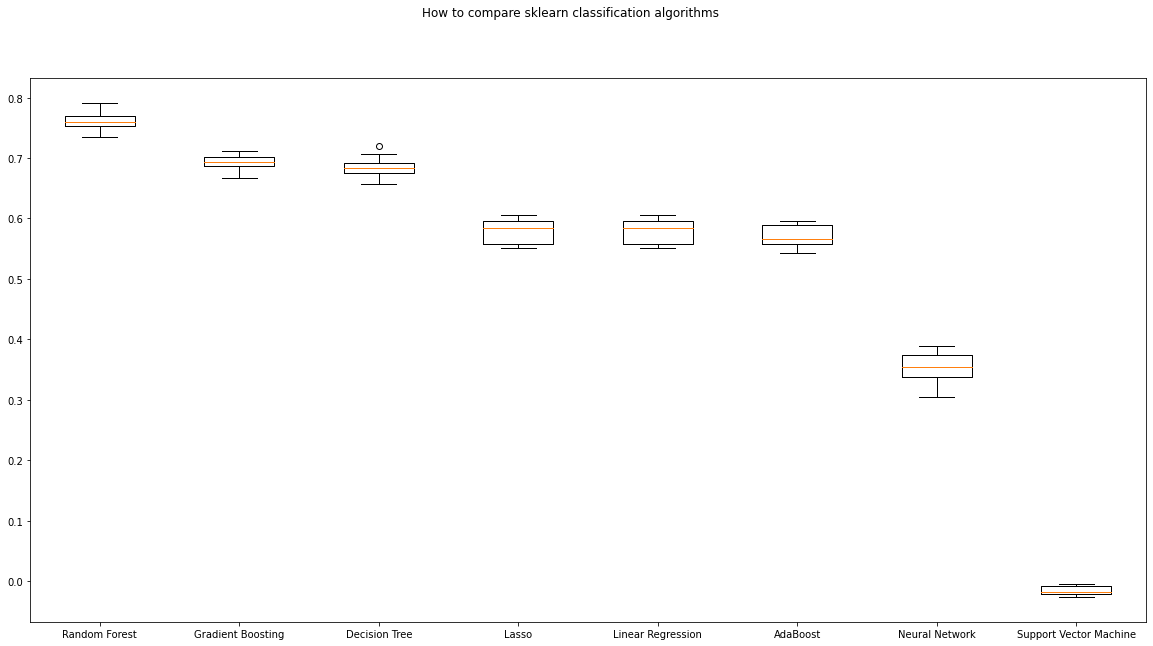

,algorithm,r2_per_iter,r2_mean,r2_std,rmse_mean,mae_mean
5,Random Forest,"[0.7572196971935965, 0.7471338506209761, 0.753...",0.760890,0.015187,-1.690445e+08,-1.160476e+08
6,Gradient Boosting,"[0.6917356177838647, 0.711482860552447, 0.6676...",0.692212,0.013448,-1.921180e+08,-1.445476e+08
4,Decision Tree,"[0.6884417966245845, 0.6739398453049894, 0.677...",0.685443,0.017168,-1.932706e+08,-1.242925e+08
1,Lasso,"[0.5902106666816722, 0.5991514898677113, 0.556...",0.578980,0.019708,-2.246485e+08,-1.748485e+08
0,Linear Regression,"[0.5902106642162193, 0.5991514909688804, 0.556...",0.578980,0.019708,-2.246485e+08,-1.748485e+08
7,AdaBoost,"[0.5431397899972756, 0.5959005802371649, 0.544...",0.569620,0.018706,-2.282438e+08,-1.851743e+08
3,Neural Network,"[0.34179142760927494, 0.3762133740898471, 0.35...",0.354342,0.024584,-2.785768e+08,-2.210784e+08
2,Support Vector Machine,"[-0.021949624391078615, -0.006611408560605048,...",-0.015401,0.007443,-3.490159e+08,-2.930961e+08


In [155]:
# Evaluate the results
fig = plt.figure(figsize=(20,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results["r2_per_iter"].to_list())
ax.set_xticklabels(results["algorithm"].to_list())
plt.show()

results

# Hyperparameter Tuning

In [122]:
!pip install optuna
!pip install scikit-optimize

## HYPERPARAMETER OPTIMIZATION ##
## Model Selection ##
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    train_test_split,
    cross_val_score,
    GroupKFold,
    LeaveOneGroupOut,
    cross_validate,
    GridSearchCV,
    RandomizedSearchCV,
)

# Scikit-optimize #
from skopt import dummy_minimize, gp_minimize, forest_minimize, gbrt_minimize 
from skopt.plots import plot_convergence, plot_evaluations
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# Hyperopt #
from hyperopt import hp, fmin
from hyperopt import rand, anneal, tpe

# Optuna #
import optuna

# for the analysis
from skopt.plots import (
    plot_convergence,
    plot_evaluations,
)

In [123]:
# load dataset
dataset = pd.read_csv("Feature Engineering/Apartment Data after Feature Engineering.csv")
X = dataset.loc[:, dataset.columns != "price"]; y = dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X

,luas_bangunan,kamar_tidur,district,sertifikat,province,luas_bangunan_na,kamar_tidur_na,sertifikat_na
0,78.0,3.0,1.246500e+09,8.407604e+08,9.366389e+08,0,0,0
1,78.0,2.0,6.865385e+08,8.473027e+08,7.602119e+08,0,0,0
2,51.0,2.0,9.754167e+08,8.473027e+08,8.742927e+08,0,0,0
3,44.0,2.0,6.546061e+08,8.473027e+08,7.602119e+08,0,0,0
4,78.0,3.0,7.645000e+08,8.407604e+08,8.742927e+08,0,0,0
...,...,...,...,...,...,...,...,...
8517,78.0,2.0,7.592453e+08,8.473027e+08,7.602119e+08,0,0,0
8518,27.0,1.0,6.181429e+08,8.473027e+08,8.790169e+08,0,0,0
8519,38.0,1.0,8.360247e+08,8.407604e+08,9.366389e+08,0,0,0
8520,43.0,1.0,1.169245e+09,8.407604e+08,8.742927e+08,0,0,0


In [140]:
# determine the hyperparameter space

param_grid = [
    Integer(100, 300, name="n_estimators"),
    Integer(1, 5, name="max_depth"),
    Real(0.001, 0.5, prior='log-uniform', name="min_samples_split"),
]

# Scikit-optimize parameter grid is a list
type(param_grid)

# set up the gradient boosting classifier

rf = GradientBoostingRegressor(random_state=0)

# We design a function to maximize the accuracy, of a GBM,
# with cross-validation

# the decorator allows our objective function to receive the parameters as
# keyword arguments. This is a requirement for scikit-optimize.

@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    rf.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            rf, 
            X_train,
            y_train,
            cv=10,
            n_jobs=-4,
            scoring='r2')
    )

    # negate because we need to minimize
    return -value

Best score=-0.7318
Best parameters:
- n_estimators = 266
- max-depth = 5
- min_samples_split = 0.015


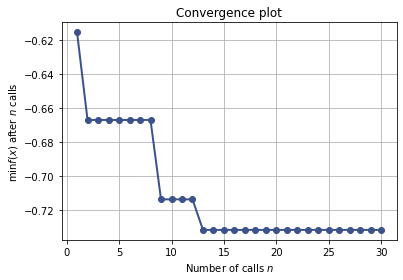

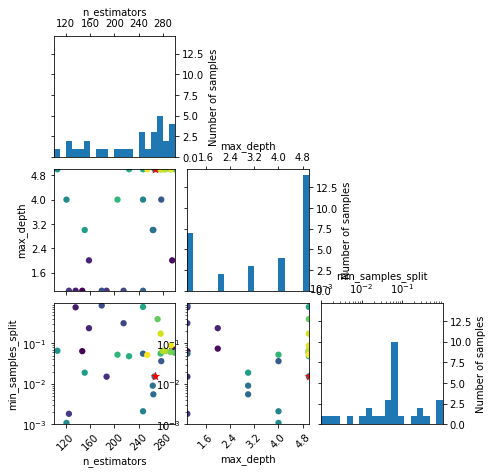

In [141]:
# forest_minimize performs Bayesian Optimization 
# using Random Forests as surrogate

fm_ = forest_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    base_estimator = 'RF', # the surrogate
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=30, # the number of subsequent evaluations of f(x)
    random_state=0, 
    n_jobs=4,
)

# function value at the minimum.
# note that it is the negative of the accuracy

print("Best score=%.4f" % fm_.fun)

print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- min_samples_split = %.3f""" % (fm_.x[0], 
                fm_.x[1],
                fm_.x[2],
               ))

plot_convergence(fm_)

dim_names = ['n_estimators', 'max_depth', 'min_samples_split']

plot_evaluations(result=fm_, plot_dims=dim_names)
plt.show()


Best score=-0.6545
Best parameters:
- n_estimators = 89
- max-depth = 5
- min_samples_split = 0.002


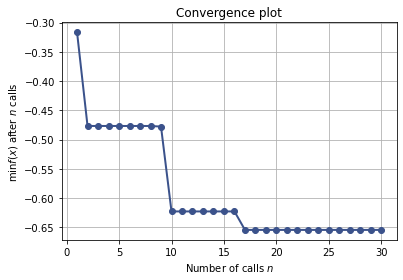

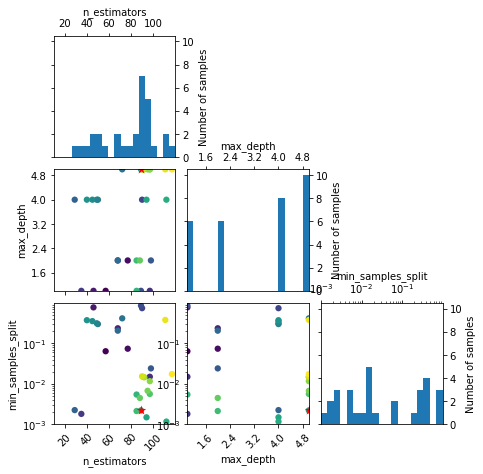

In [135]:
# function value at the minimum.
# note that it is the negative of the accuracy

print("Best score=%.4f" % fm_.fun)

print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- min_samples_split = %.3f""" % (fm_.x[0], 
                fm_.x[1],
                fm_.x[2],
               ))

plot_convergence(fm_)

dim_names = ['n_estimators', 'max_depth', 'min_samples_split']

plot_evaluations(result=fm_, plot_dims=dim_names)
plt.show()